In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

companies = pd.read_csv('/content/unicorn datset.csv')
companies


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,6/29/17,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,4/18/17,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,5/6/21,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,10/19/21,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


In [3]:
companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [16]:
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])

In [17]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


In [18]:
companies["Year Joined"] = companies["Date Joined"].dt.year
#create new column year joined ectracting from date joined column

In [20]:
companies.head(10)
#top 10

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011
5,Canva,$40B,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat...",2018
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST...",2019
7,Instacart,$39B,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By...",2014
8,JUUL Labs,$38B,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management,2017
9,Databricks,$38B,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates...",2019


In [21]:
companies_sample = companies.sample(n = 50, random_state= 42)
#taking sample data

In [22]:
# create  new `years_till_unicorn` column
companies_sample["years_till_unicorn"] = companies_sample["Year Joined"] - companies_sample["Year Founded"]

# group the data by `Industry`. for each industry, get the max value in the `years_till_unicorn` column.
grouped = (companies_sample[["Industry", "years_till_unicorn"]]
           .groupby("Industry")
           .max()
           .sort_values(by="years_till_unicorn")
          )
grouped

,years_till_unicorn
Industry,
Consumer & retail,1
Auto & transportation,2
Artificial intelligence,5
Data management & analytics,8
Mobile & telecommunications,9
"Supply chain, logistics, & delivery",12
Internet software & services,13
Other,15
E-commerce & direct-to-consumer,18


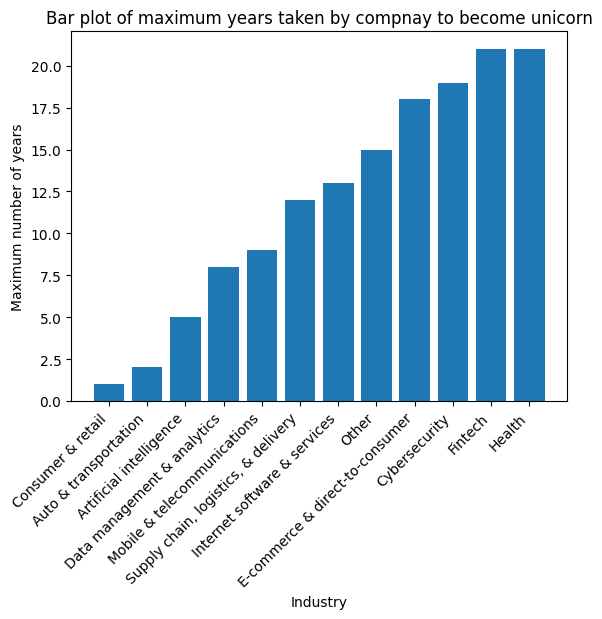

In [23]:
# finally create bar graph chart for above table
plt.bar(grouped.index, grouped['years_till_unicorn'])

#title
plt.title('Bar plot of maximum years taken by compnay to become unicorn')

# x -axis
plt.xlabel('Industry')

#y - axis
plt.ylabel('Maximum number of years')

# position of labels of x Axis
plt.xticks(rotation = 45, horizontalalignment ="right")

#display

plt.show()

In [24]:
# Now the visualization of company valuation per industry
#new column
companies_sample['Valuation_billions'] = companies_sample['Valuation']

#remove Dollar And billons from Each Value
companies_sample['Valuation_billions'] = companies_sample['Valuation_billions'].str.replace('$', '')
companies_sample['Valuation_billions'] = companies_sample['Valuation_billions'].str.replace('B', '')

#New Column type
companies_sample['Valuation_billions'] = companies_sample['Valuation_billions'].astype('int')

companies_sample.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,years_till_unicorn,Valuation_billions
542,Aiven,$2B,2021-10-18,Internet software & services,Helsinki,Finland,Europe,2016,$210M,"Institutional Venture Partners, Atomico, Early...",2021,5,2
370,Jusfoun Big Data,$2B,2018-07-09,Data management & analytics,Beijing,China,Asia,2010,$137M,"Boxin Capital, DT Capital Partners, IDG Capital",2018,8,2
307,Innovaccer,$3B,2021-02-19,Health,San Francisco,United States,North America,2014,$379M,"M12, WestBridge Capital, Lightspeed Venture Pa...",2021,7,3
493,Algolia,$2B,2021-07-28,Internet software & services,San Francisco,United States,North America,2012,$334M,"Accel, Alven Capital, Storm Ventures",2021,9,2
350,SouChe Holdings,$3B,2017-11-01,E-commerce & direct-to-consumer,Hangzhou,China,Asia,2012,$1B,"Morningside Ventures, Warburg Pincus, CreditEa...",2017,5,3
237,Webflow,$4B,2021-01-13,Internet software & services,San Francisco,United States,North America,2012,$335M,"Accel, Silversmith Capital Partners, capitalG",2021,9,4
475,Gousto,$2B,2020-11-03,"Supply chain, logistics, & delivery",London,United Kingdom,Europe,2012,$311M,"MMC Ventures, BGF Ventures, Unilever Ventures",2020,8,2
578,Misfits Market,$2B,2021-04-21,E-commerce & direct-to-consumer,Pennsauken,United States,North America,2018,$527M,"Accel, D1 Capita Partners, Greenoaks Capital M...",2021,3,2
462,Hibob,$2B,2021-10-12,Internet software & services,Tel Aviv,Israel,Asia,2015,$274M,"Bessemer Venture Partners, Eight Roads Venture...",2021,6,2
978,News Break,$1B,2021-01-07,Internet software & services,Mountain View,United States,North America,2015,$151M,"IDG Capital, Francisco Partners, ZhenFund",2021,6,1


In [25]:
# table for data modeling
grouped = (companies_sample[["Industry", "Valuation_billions"]]
           .groupby("Industry")
           .max()
           .sort_values(by = 'Valuation_billions'))
grouped


,Valuation_billions
Industry,
Auto & transportation,1
Consumer & retail,1
Other,2
"Supply chain, logistics, & delivery",2
Cybersecurity,3
Health,3
Data management & analytics,4
E-commerce & direct-to-consumer,4
Internet software & services,5


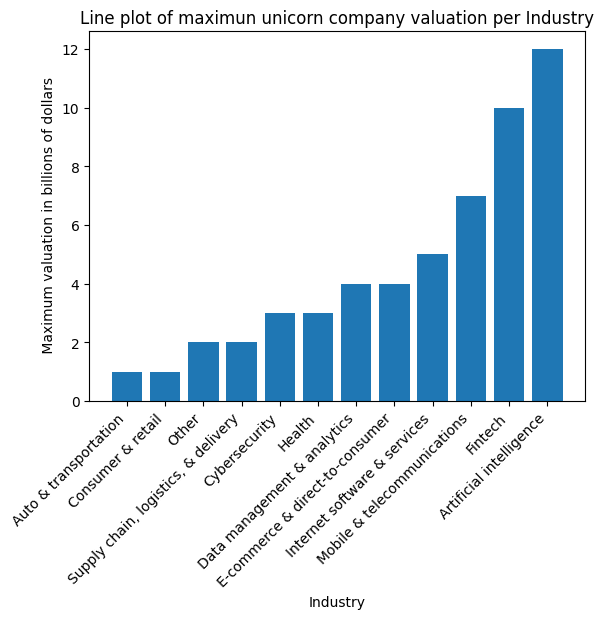

In [27]:
# Bar graph PResentation
plt.bar(grouped.index, grouped['Valuation_billions'])

#title
plt.title("Line plot of maximun unicorn company valuation per Industry")

#X-Lable
plt.xlabel("Industry")

#y_lable
plt.ylabel(" Maximum valuation in billions of dollars")

#presetation of label of x axis

plt.xticks(rotation = 45, horizontalalignment = 'right')

#display plot
plt.show()